In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0
# Convert class vectors to binary class matrices (one-hot encoding)
# Example: label 3 → [0,0,0,1,0,0,0,0,0,0]
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test,  10)
print(f"Training data shape: {x_train.shape}")   # (50000, 32, 32, 3)
print(f"Test data shape:     {x_test.shape}")    # (10000, 32, 32, 3)


Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape:     (10000, 32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
      # Output layer – 10 classes
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()   # Print model architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
print("\nTraining the model...")
history = model.fit(x_train, y_train,
                    epochs=40,               # increase to 30–50 for better results
                    batch_size=120,
                    validation_data=(x_test, y_test),
                    verbose=1)



Training the model...
Epoch 1/40
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9800 - loss: 0.0593 - val_accuracy: 0.8264 - val_loss: 0.7660
Epoch 2/40
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9786 - loss: 0.0614 - val_accuracy: 0.8431 - val_loss: 0.7191
Epoch 3/40
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9784 - loss: 0.0639 - val_accuracy: 0.8428 - val_loss: 0.7483
Epoch 4/40
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9776 - loss: 0.0634 - val_accuracy: 0.8255 - val_loss: 0.8718
Epoch 5/40
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9778 - loss: 0.0630 - val_accuracy: 0.8394 - val_loss: 0.7628
Epoch 6/40
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9789 - loss: 0.0594 - val_accuracy: 0.8451 - val_loss: 0.7598
Epoch 7/40
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9795 - loss: 0.0606 - val_accuracy: 0.8431 - val_loss: 0.7236
Epoch 8/40
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9804 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")



Test accuracy: 0.8424  (84.24%)


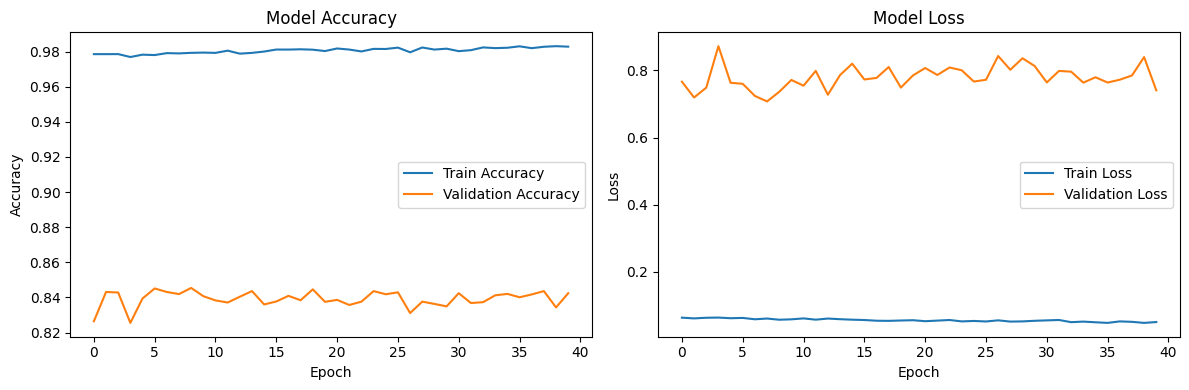

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


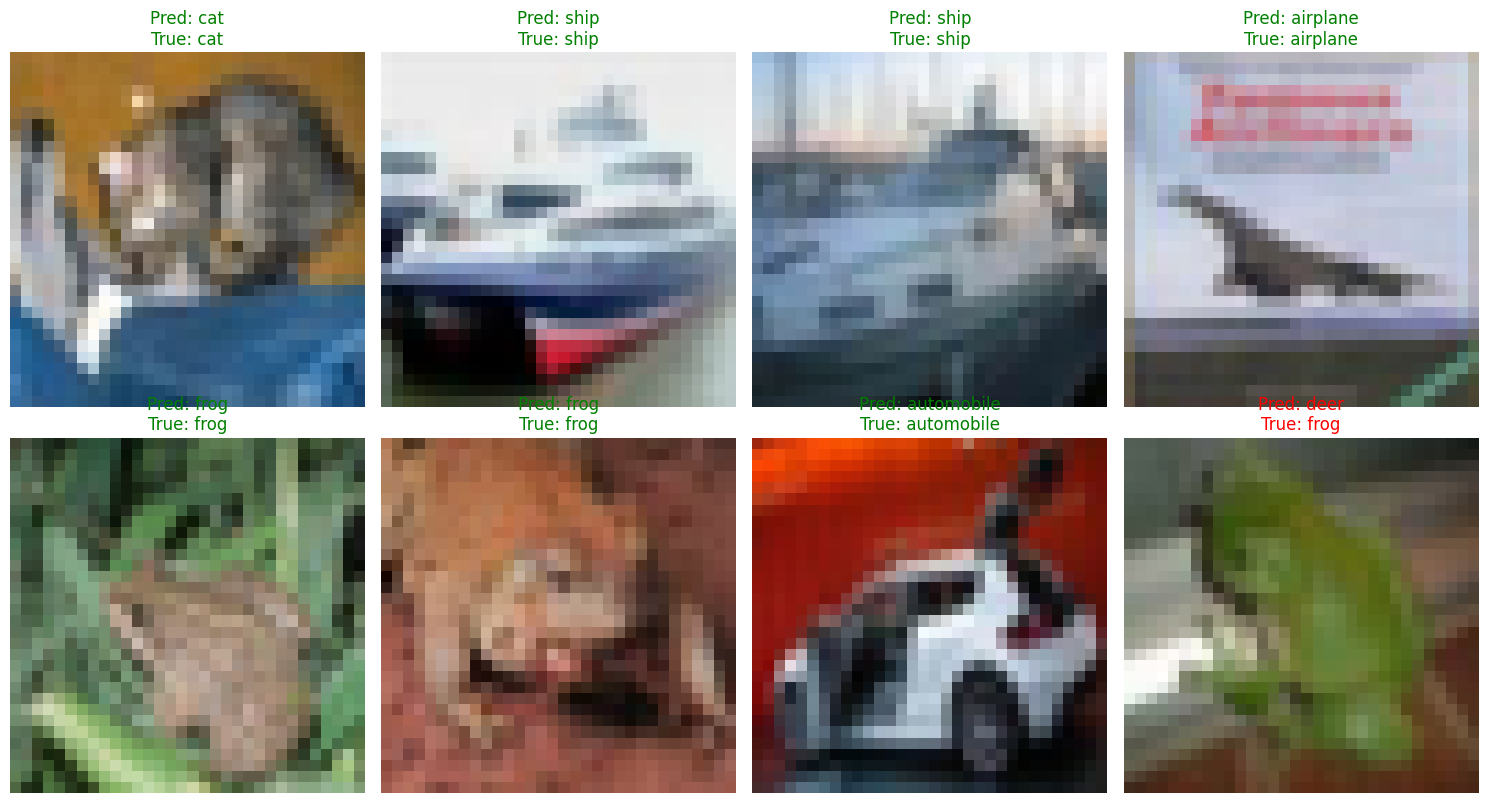

Practical 1 completed.


In [ ]:
num_images = 8
predictions = model.predict(x_test[:num_images])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:num_images], axis=1)
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color=("green" if predicted_classes[i] == true_classes[i] else "red"))
    plt.axis('off')
plt.tight_layout()
plt.show()
# Optional: Save the model
# model.save("basic_cifar10_cnn.h5")
print("Practical 1 completed.")




LAB - 2


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Downloading Cats vs Dogs dataset...")

_URL = 'https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file(
    'cats_and_dogs.zip',
    origin=_URL,
    extract=True
)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

print("Dataset loaded successfully!")

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded successfully!


In [ ]:
# Re-evaluate paths based on kernel state for path_to_zip
# path_to_zip was found to be '/root/.keras/datasets/cats_and_dogs_extracted' in the kernel state.
# The actual dataset content is typically in a subdirectory named 'cats_and_dogs_filtered' inside the extracted folder.
corrected_PATH = os.path.join(path_to_zip, 'cats_and_dogs_filtered')
corrected_train_dir = os.path.join(corrected_PATH, 'train')
corrected_validation_dir = os.path.join(corrected_PATH, 'validation')

train_cats = len(os.listdir(os.path.join(corrected_train_dir, 'cats')))
train_dogs = len(os.listdir(os.path.join(corrected_train_dir, 'dogs')))
val_cats = len(os.listdir(os.path.join(corrected_validation_dir, 'cats')))
val_dogs = len(os.listdir(os.path.join(corrected_validation_dir, 'dogs')))

print(f"Training Cats: {train_cats}")
print(f"Training Dogs: {train_dogs}")
print(f"Validation Cats: {val_cats}")
print(f"Validation Dogs: {val_dogs}")

Training Cats: 1000
Training Dogs: 1000
Validation Cats: 500
Validation Dogs: 500


In [ ]:
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [ ]:
  train_generator = train_datagen.flow_from_directory(
    corrected_train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    corrected_validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("Class labels:", train_generator.class_indices)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Class labels: {'cats': 0, 'dogs': 1}


In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint("best_vgg16_model.h5", save_best_only=True)
]

print("Phase 1: Training top layers only")

history_phase1 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

Phase 1: Training top layers only


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.6470 - loss: 2.3641

63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 480ms/step - accuracy: 0.6486 - loss: 2.3503 - val_accuracy: 0.9460 - val_loss: 0.2163
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.8846 - loss: 0.5628

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.8847 - loss: 0.5622 - val_accuracy: 0.9560 - val_loss: 0.1721
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.9209 - loss: 0.3300

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.9207 - loss: 0.3308 - val_accuracy: 0.9590 - val_loss: 0.1721
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.9252 - loss: 0.2971

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.9252 - loss: 0.2977 - val_accuracy: 0.9600 - val_loss: 0.1708
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.9326 - loss: 0.3050

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9326 - loss: 0.3051 - val_accuracy: 0.9620 - val_loss: 0.1672
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.9360 - loss: 0.2538

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.9361 - loss: 0.2533 - val_accuracy: 0.9670 - val_loss: 0.1471
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9468 - loss: 0.2112

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - accuracy: 0.9467 - loss: 0.2118 - val_accuracy: 0.9680 - val_loss: 0.1372
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.9511 - loss: 0.1902 - val_accuracy: 0.9670 - val_loss: 0.1419
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.9491 - loss: 0.2119 - val_accuracy: 0.9650 - val_loss: 0.1519
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - accuracy: 0.9519 - loss: 0.1800 - val_accuracy: 0.9640 - val_loss: 0.1437


In [ ]:
train_acc_phase1 = history_phase1.history['accuracy'][-1]
val_acc_phase1 = history_phase1.history['val_accuracy'][-1]

print(f"Phase 1 - Training Accuracy: {train_acc_phase1*100:.2f}%")
print(f"Phase 1 - Validation Accuracy: {val_acc_phase1*100:.2f}%")

Phase 1 - Training Accuracy: 95.50%
Phase 1 - Validation Accuracy: 96.40%


Phase-2

In [ ]:
print("Unfreezing top VGG16 layers for fine-tuning...")

base_model.trainable = True

for layer in base_model.layers[:-16]:
    layer.trainable = False


Unfreezing top VGG16 layers for fine-tuning...


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Phase 2: Fine-tuning")

history_phase2 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

Phase 2: Fine-tuning
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.9323 - loss: 0.2466

63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 619ms/step - accuracy: 0.9323 - loss: 0.2463 - val_accuracy: 0.9680 - val_loss: 0.0886
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 354ms/step - accuracy: 0.9520 - loss: 0.1243 - val_accuracy: 0.9600 - val_loss: 0.1129
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9663 - loss: 0.0883

63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 367ms/step - accuracy: 0.9663 - loss: 0.0883 - val_accuracy: 0.9750 - val_loss: 0.0691
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.9690 - loss: 0.0721

63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.9690 - loss: 0.0722 - val_accuracy: 0.9770 - val_loss: 0.0588
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.9726 - loss: 0.0710

63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 367ms/step - accuracy: 0.9727 - loss: 0.0709 - val_accuracy: 0.9820 - val_loss: 0.0517
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.9792 - loss: 0.0665 - val_accuracy: 0.9740 - val_loss: 0.0712
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 358ms/step - accuracy: 0.9854 - loss: 0.0444 - val_accuracy: 0.9750 - val_loss: 0.0945
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.9917 - loss: 0.0306 - val_accuracy: 0.9770 - val_loss: 0.0587


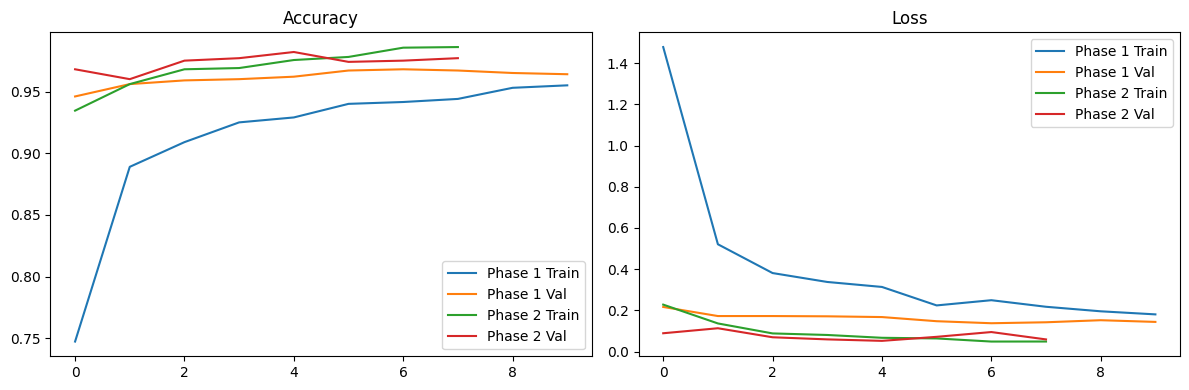

In [ ]:
def plot_history(histories, titles):
    plt.figure(figsize=(12,4))

    for i, hist in enumerate(histories):
        plt.subplot(1,2,1)
        plt.plot(hist.history['accuracy'], label=f'{titles[i]} Train')
        plt.plot(hist.history['val_accuracy'], label=f'{titles[i]} Val')
        plt.title("Accuracy")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(hist.history['loss'], label=f'{titles[i]} Train')
        plt.plot(hist.history['val_loss'], label=f'{titles[i]} Val')
        plt.title("Loss")
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(
    [history_phase1, history_phase2],
    ["Phase 1", "Phase 2"]
)
